# ایجاد کتابخانه های مورد نیاز و خواندن دیتاست گل زنبق و نمایش 4  فیچرآن

In [56]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df[4] = df[4].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


# در این مرحله دیتاست را با استفاده از اسکیل کردن استاندارد می کنیم

In [57]:
y, X = df.iloc[:, 4].values, df.iloc[:, 0:4].values
X_cent = X - X.mean(axis=0)
X_std = X_cent / X.std(axis=0)


# سپس توابع میانگین و کوواریانس نمونه زرا با استفاده از تعریف می نویسیم 

In [58]:
import numpy as np

def comp_mean_vectors(X, y):
    class_labels = np.unique(y)
    n_classes = class_labels.shape[0]
    mean_vectors = []
    for cl in class_labels:
        mean_vectors.append(np.mean(X[y==cl], axis=0))
    return mean_vectors

def scatter_within(X, y):
    class_labels = np.unique(y)
    n_classes = class_labels.shape[0]
    n_features = X.shape[1]
    mean_vectors = comp_mean_vectors(X, y)
    S_W = np.zeros((n_features, n_features))
    for cl, mv in zip(class_labels, mean_vectors):
        class_sc_mat = np.zeros((n_features, n_features))                 
        for row in X[y == cl]:
            row, mv = row.reshape(n_features, 1), mv.reshape(n_features, 1)
            class_sc_mat += (row-mv).dot((row-mv).T)
        S_W += class_sc_mat                           
    return S_W

def scatter_between(X, y):
    overall_mean = np.mean(X, axis=0)
    n_features = X.shape[1]
    mean_vectors = comp_mean_vectors(X, y)    
    S_B = np.zeros((n_features, n_features))
    for i, mean_vec in enumerate(mean_vectors):  
        n = X[y==i+1,:].shape[0]
        mean_vec = mean_vec.reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    return S_B

def get_components(eig_vals, eig_vecs, n_comp=2):
    n_features = X.shape[1]
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
    eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)
    W = np.hstack([eig_pairs[i][1].reshape(4, 1) for i in range(0, n_comp)])
    return W


# محاسبه ماتریس اسکتر و با استفاده از تعریف و چاپ آن

In [59]:

S_W, S_B = scatter_within(X, y), scatter_between(X, y)
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
W = get_components(eig_vals, eig_vecs, n_comp=2)
print('EigVals: %s\n\nEigVecs: %s' % (eig_vals, eig_vecs))
print('\nW: %s' % W)


EigVals: [ 2.0905e+01+0.0000e+00j  1.4283e-01+0.0000e+00j -2.4966e-15+1.2293e-15j
 -2.4966e-15-1.2293e-15j]

EigVecs: [[-0.2067+0.j      0.0018+0.j      0.2293+0.228j   0.2293-0.228j ]
 [-0.4159+0.j     -0.5626+0.j     -0.389 -0.1007j -0.389 +0.1007j]
 [ 0.5616+0.j      0.2232+0.j     -0.4467-0.0992j -0.4467+0.0992j]
 [ 0.6848+0.j     -0.796 +0.j      0.7243+0.j      0.7243-0.j    ]]

W: [[-0.2067+0.j  0.0018+0.j]
 [-0.4159+0.j -0.5626+0.j]
 [ 0.5616+0.j  0.2232+0.j]
 [ 0.6848+0.j -0.796 +0.j]]


# تعریف توابع بردار ویژه و مقدارویژه , رسم نمودار ساب پلات

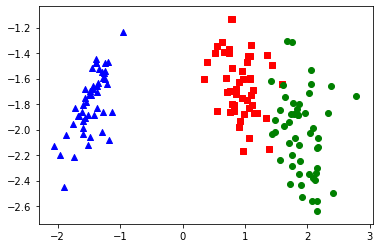

In [60]:
X_lda = X.dot(W)
for label,marker,color in zip(
        np.unique(y),('^', 's', 'o'),('blue', 'red', 'green')):
    plt.scatter(X_lda[y==label, 0], X_lda[y==label, 1],
                color=color, marker=marker)


# حال در این مرحله همین پروسه را برای دیتاست استاندارد شده گل زنبق تکرار می  کنیم

In [61]:
S_W, S_B = scatter_within(X_std, y), scatter_between(X_std, y)
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
W_std = get_components(eig_vals, eig_vecs, n_comp=2)
print('EigVals: %s\n\nEigVecs: %s' % (eig_vals, eig_vecs))
print('\nW: %s' % W_std)


EigVals: [ 2.0905e+01  1.4283e-01 -6.7207e-16  1.1082e-15]

EigVecs: [[ 0.1492 -0.0019  0.8194 -0.3704]
 [ 0.1572  0.3193 -0.1382 -0.0884]
 [-0.8635 -0.5155 -0.5078 -0.5106]
 [-0.4554  0.7952 -0.2271  0.7709]]

W: [[ 0.1492 -0.0019]
 [ 0.1572  0.3193]
 [-0.8635 -0.5155]
 [-0.4554  0.7952]]


# versicolor)(قرمز رنگ) virginica(سبزرنگ)رسم نمودارsetosa(رنگ آبی)

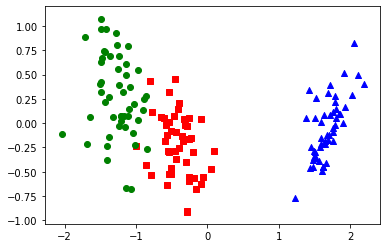

In [62]:
X_std_lda = X_std.dot(W_std)
X_std_lda[:, 1] = X_std_lda[:, 1]
for label,marker,color in zip(
        np.unique(y),('^', 's', 'o'),('blue', 'red', 'green')):
    plt.scatter(X_std_lda[y==label, 0], X_std_lda[y==label, 1],
                color=color, marker=marker)
